In [2]:
# Imports

import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import io
import time
import seaborn as sns
from sklearn.cluster import KMeans

C:\Users\dylan\AppData\Local\Temp\ipykernel_17424\2713767246.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Aquisition des données
path = '"C:/Users/dylan/OneDrive/Documents/projet ilôt/IlotsDeChaleur/datatest/features_01_2018.csv"'
chemin_dossier_zip = "./datatest/features_01_2018.zip"
#data_complète = pd.read_csv(path)
#data = data_complète.iloc[:,8:]

# Ouvrir le dossier zippé en mode lecture
dico_données = {}       # Ce dictionnaire contiendra toutes les données de précipitations extraites.
with zipfile.ZipFile(chemin_dossier_zip, 'r') as zip_ref:
    # Liste des noms de fichiers dans le dossier zippé
    fichiers_dans_zip = zip_ref.namelist()
    
    # Parcourir les fichiers dans le dossier zippé
    a = 0   # Nombre de fichiers contenus dans l'archive. 
    for nom_fichier in fichiers_dans_zip:
        a = a+1
        print(nom_fichier)
        # Extraire les données du fichier sans les sauvegarder dans un nouveau dossier
        with zip_ref.open(nom_fichier) as fichier:
            fichier_csv = io.TextIOWrapper(fichier, encoding='utf-8')
            # Lire le fichier CSV avec le module csv
            dataframe = pd.read_csv(fichier_csv)
            #nom_variable = f"données_{a}"
            nom_variable = "données_" + str(a)
            dico_données[nom_variable] = dataframe
            print(dataframe)

# Données plus petites pour tester l'algorithme

dataframe_2 = dataframe.sample(10000)

features_01_2018.csv
          Unnamed: 0  year  month  day    i    j  start_time_relative  \
0                  0  2018      1    1    0    0                    0   
1                  1  2018      1    1    0    0                    4   
2                  2  2018      1    1    0    0                   25   
3                  3  2018      1    1    0    0                   39   
4                  4  2018      1    1    0    0                   57   
...              ...   ...    ...  ...  ...  ...                  ...   
14940922    14940922  2018      1   31  299  297                  169   
14940923    14940923  2018      1   31  299  297                  180   
14940924    14940924  2018      1   31  299  298                  180   
14940925    14940925  2018      1   31  299  299                  180   
14940926    14940926  2018      1   31  299  299                  215   

          start_time_absolute  duration  max_intensity  mean_intensity  \
0                           

In [10]:
#Comparaison de la répartition des données avec un k-means

k=3 #nombre de cluster

def kmeans(dataset,k):
    kmeans = KMeans(n_clusters=k)       # Initialisation du modèle KMeans
    kmeans.fit(dataset)        # Entraînement du modèle
    labels = kmeans.labels_     # Obtention des labels de cluster pour chaque point de données
    return pd.DataFrame({'cluster_label': labels})

Labels = kmeans(dataframe_2,k)
Labels_all = Labels.fillna(-1)
print(Labels_all)


      cluster_label
0                 0
1                 1
2                 2
3                 0
4                 1
...             ...
9995              1
9996              1
9997              2
9998              1
9999              0

[10000 rows x 1 columns]


In [5]:
def Kernel_PCA_data_rbf(data_complète):

    data = data_complète.iloc[:,8:] #seules features utilisées pour le clustering
    X_train, X_test = train_test_split(data, random_state=0)
    n_features = data.shape[1]
    kernel_pca = KernelPCA(n_components = n_features, kernel="rbf", gamma=10, fit_inverse_transform=True)
    data_pca = kernel_pca.fit(X_train).transform(X_test)
    column = []
    for i in range(n_features):
        column.append('principal componant ' + str(i))
    pca_df = pd.DataFrame(data_pca, columns=column)
    return pca_df
    
df_pca_kernel_rbf = pd.concat([Kernel_PCA_data_rbf(dataframe_2),Labels],axis=1)
print(df_pca_kernel_rbf)

      principal componant 0  principal componant 1  principal componant 2  \
0                 -0.159697              -0.116277              -0.017230   
1                 -0.159582              -0.116097              -0.017190   
2                 -0.213336              -0.251436              -0.088096   
3                  0.509222              -0.014930               0.673568   
4                 -0.184432              -0.168742              -0.038486   
...                     ...                    ...                    ...   
9995                    NaN                    NaN                    NaN   
9996                    NaN                    NaN                    NaN   
9997                    NaN                    NaN                    NaN   
9998                    NaN                    NaN                    NaN   
9999                    NaN                    NaN                    NaN   

      principal componant 3  principal componant 4  cluster_label  
0      

In [11]:
def Kernel_PCA_data_linear(data_complète):

    data = data_complète.iloc[:,8:] #seules features utilisées pour le clustering
    X_train, X_test = train_test_split(data, random_state=0)
    n_features = data.shape[1]
    kernel_pca = KernelPCA(n_components = n_features, kernel="linear", gamma=10, fit_inverse_transform=True)
    data_pca = kernel_pca.fit(X_train).transform(X_test)
    column = []
    for i in range(n_features):
        column.append('principal componant ' + str(i))
    pca_df = pd.DataFrame(data_pca, columns=column)
    return pca_df

df_pca_kernel_linear = pd.concat([Kernel_PCA_data_linear(dataframe_2),Labels],axis=1)
print(df_pca_kernel_linear)

      principal componant 0  principal componant 1  principal componant 2  \
0                 40.011173              -4.573942               2.184468   
1                 27.695212               8.973534              -5.657693   
2                 -4.803343              -0.806057               0.341690   
3                 -6.814764              -0.749403               0.401566   
4                 -4.763012              -0.607200              -0.029133   
...                     ...                    ...                    ...   
9995                    NaN                    NaN                    NaN   
9996                    NaN                    NaN                    NaN   
9997                    NaN                    NaN                    NaN   
9998                    NaN                    NaN                    NaN   
9999                    NaN                    NaN                    NaN   

      principal componant 3  principal componant 4  cluster_label  
0      

In [ ]:
def Kernel_PCA_data_sigmoid(data_complète):

    data = data_complète.iloc[:,8:] #seules features utilisées pour le clustering
    X_train, X_test = train_test_split(data, random_state=0)
    n_features = data.shape[1]
    kernel_pca = KernelPCA(n_components = n_features, kernel="sigmoid", gamma=10, fit_inverse_transform=True)
    data_pca = kernel_pca.fit(X_train).transform(X_test)
    column = []
    for i in range(n_features):
        column.append('principal componant ' + str(i))
    pca_df = pd.DataFrame(data_pca, columns=column)
    return pca_df

df_pca_kernel_sigmoid = pd.concat([Kernel_PCA_data_sigmoid(dataframe_2),Labels],axis=1)
print(df_pca_kernel_sigmoid)

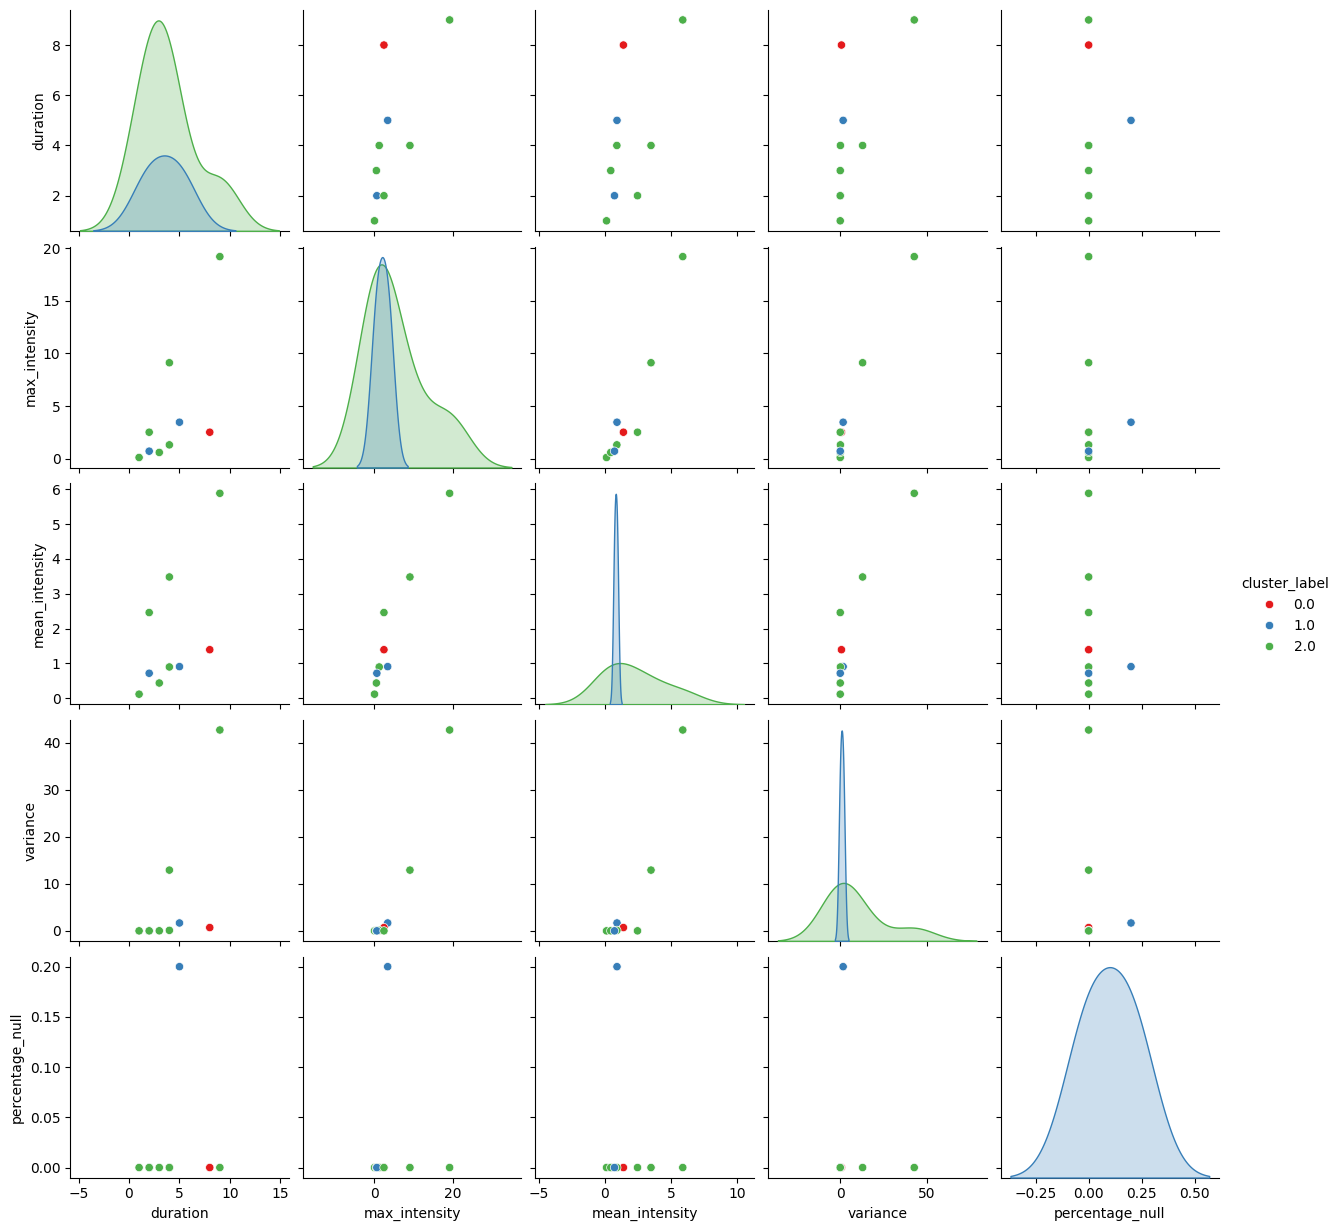

In [7]:
# Original features

df_sample_0 = dataframe_2[['duration', 'max_intensity', 'mean_intensity', 'variance', 'percentage_null']] # only keep features of interest
df_sample = pd.concat([df_sample_0,Labels_all],axis=1)
sns.pairplot(df_sample, diag_kind="kde",hue='cluster_label', palette='Set1')

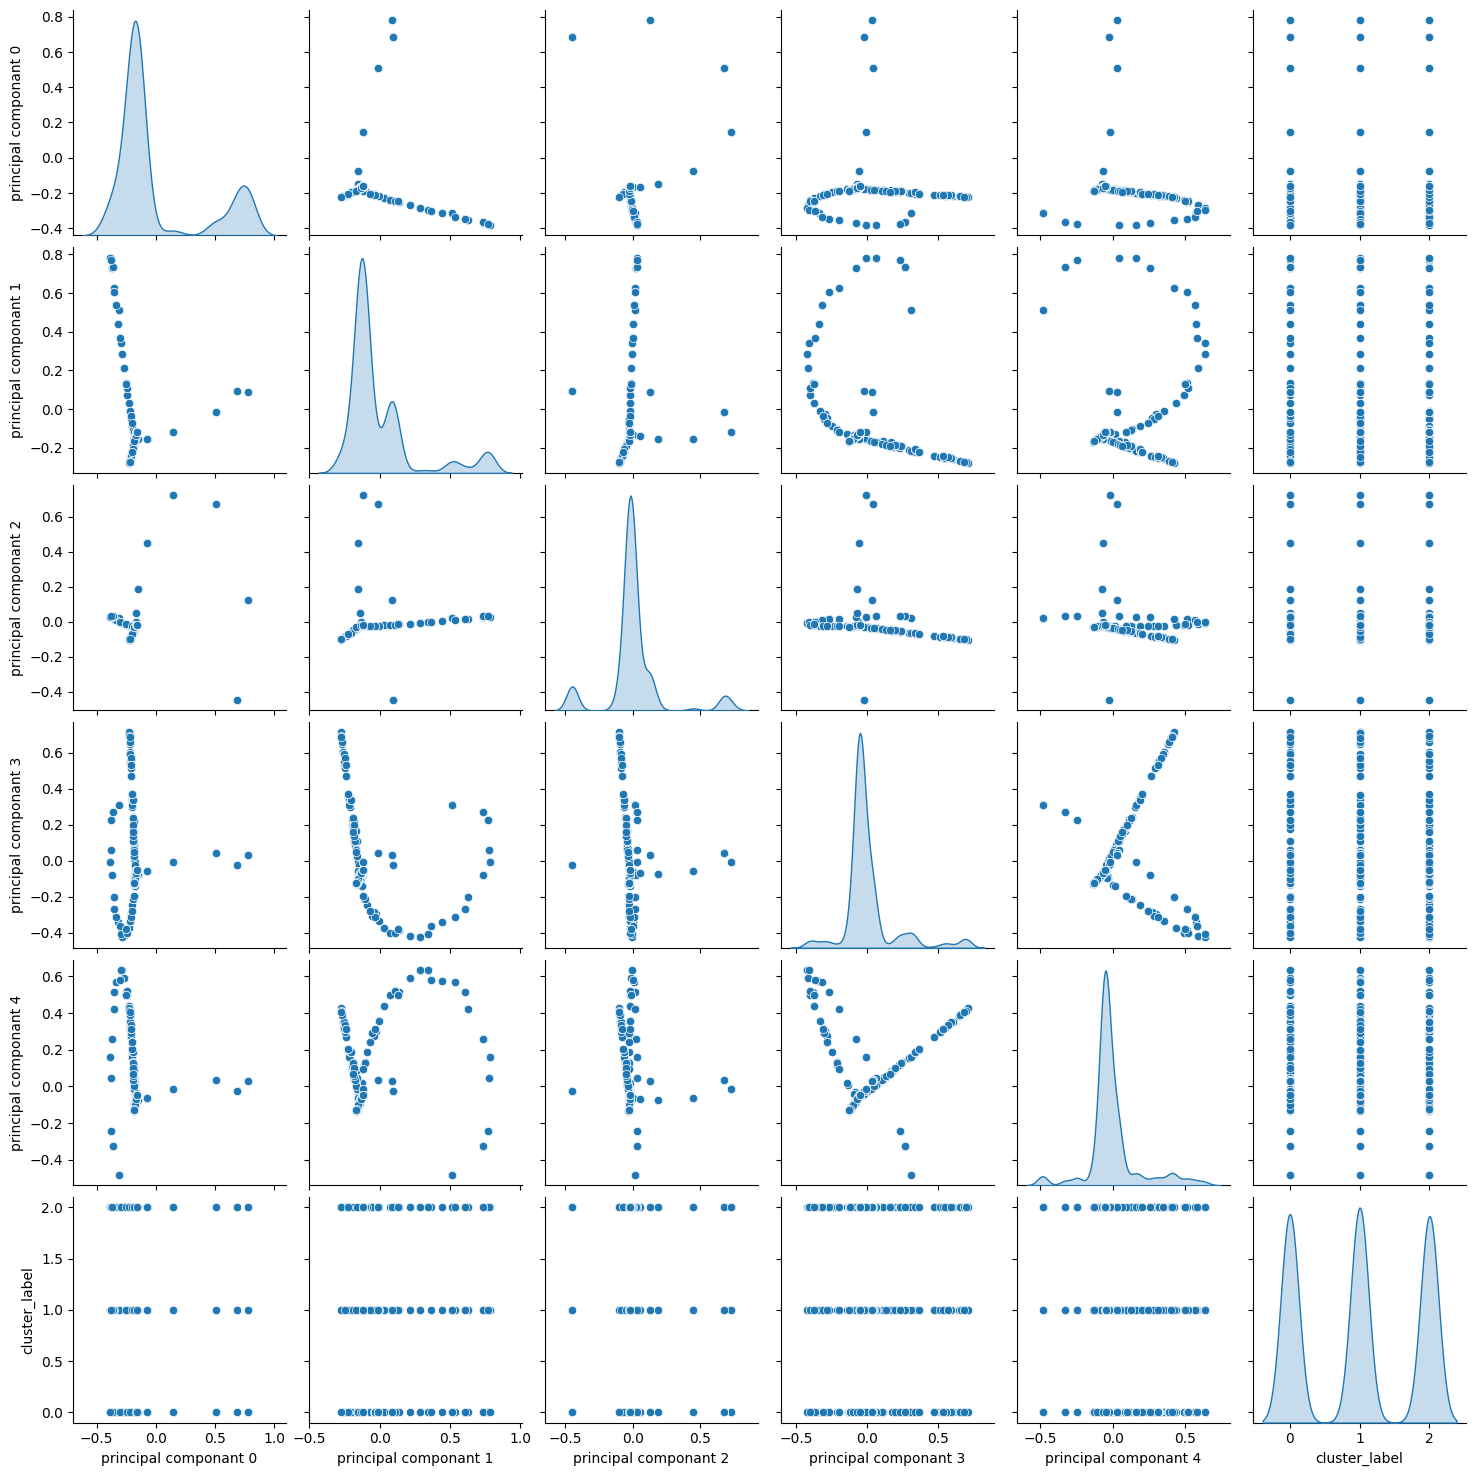

In [8]:
# Composantes principales Radial Basis Function Kernel

sns.pairplot(df_pca_kernel_rbf, diag_kind="kde",hue='cluster_label', palette='Set1')

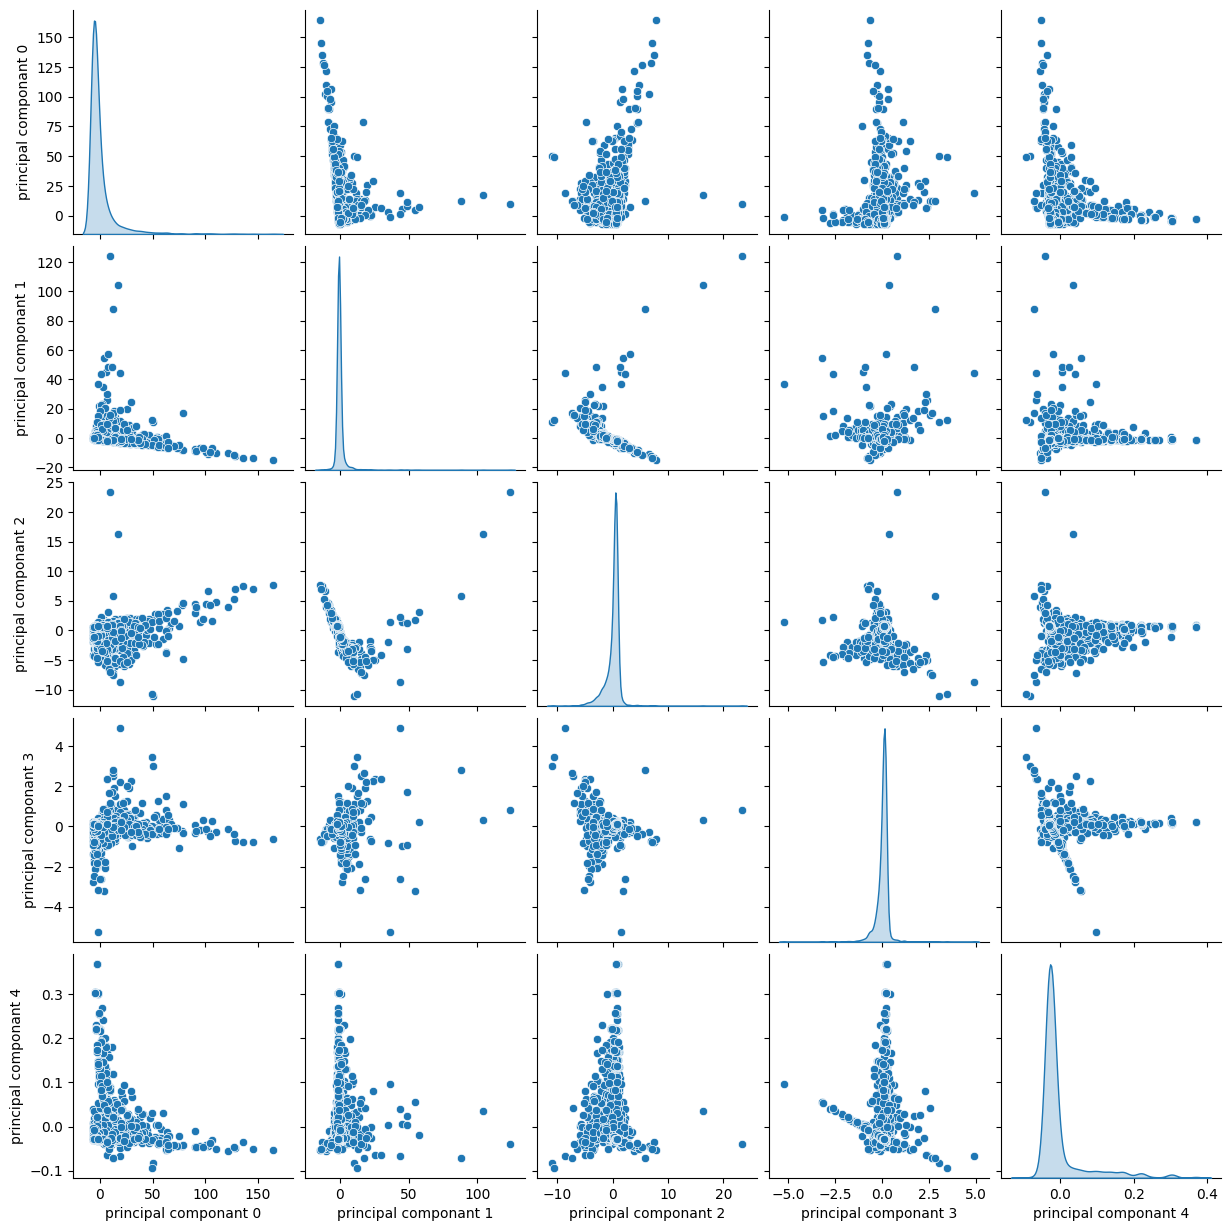

In [9]:
# Composantes principales linear Function Kernel
sns.pairplot(df_pca_kernel_linear, diag_kind="kde")